<a href="https://colab.research.google.com/github/shreyakudmethi/Deep-learning/blob/main/p3_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned parameters (Gradient Descent): θ0 = 153.74, θ1 = 47.14


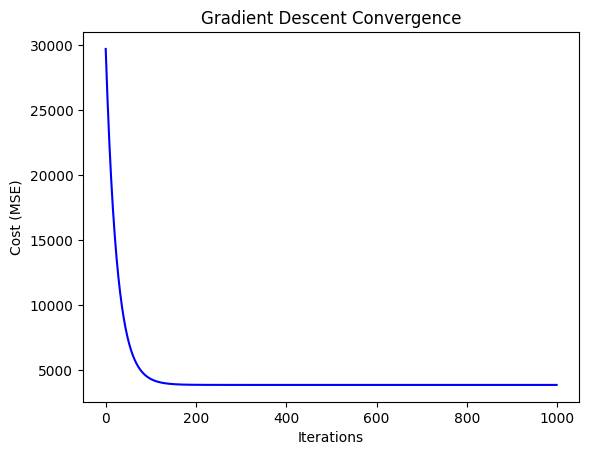

Test MSE (Gradient Descent): 4061.83
Parameters (Normal Equation): θ0 = 153.74, θ1 = 47.14
Test MSE (Normal Equation): 4061.83


In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
diabetes = load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # BMI feature
y = diabetes.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add intercept term
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Initialize parameters
theta = np.zeros(2)  # θ0 and θ1
learning_rate = 0.01
iterations = 1000
m = len(y_train)
cost_history = []

# Batch Gradient Descent
for i in range(iterations):
    predictions = X_train_b.dot(theta)
    errors = predictions - y_train
    gradients = (2/m) * X_train_b.T.dot(errors)
    theta -= learning_rate * gradients
    cost = (1/m) * np.sum(errors**2)
    cost_history.append(cost)

# Print learned parameters
print(f"Learned parameters (Gradient Descent): θ0 = {theta[0]:.2f}, θ1 = {theta[1]:.2f}")

# Plot cost vs iterations
plt.plot(range(iterations), cost_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.show()

# Evaluate model on test set
y_pred = X_test_b.dot(theta)
mse_test = np.mean((y_test - y_pred)**2)
print(f"Test MSE (Gradient Descent): {mse_test:.2f}")

# Compare with Normal Equation
theta_normal = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print(f"Parameters (Normal Equation): θ0 = {theta_normal[0]:.2f}, θ1 = {theta_normal[1]:.2f}")

y_pred_normal = X_test_b.dot(theta_normal)
mse_normal = np.mean((y_test - y_pred_normal)**2)
print(f"Test MSE (Normal Equation): {mse_normal:.2f}")
